Q1) How can farming practices be optimised while promoting sustainability and reducing environmental impact?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [2]:
farmer_df = pd.read_csv('./data/farmer_advisor_dataset.csv')
farmer_df.drop(columns='Farm_ID', inplace=True)

In [3]:
encoder = OneHotEncoder(sparse_output=False)

def create_random_forest_reg(col_to_pred, crop_type = None, drop_crop_yield = True, max_depth = 5):
    temp_df = farmer_df.copy(deep=True)
    true_y = temp_df[col_to_pred]
    temp_df.drop(columns=col_to_pred, inplace=True)

    if drop_crop_yield:
        temp_df.drop(columns='Crop_Yield_ton', inplace=True)
    
    if crop_type is None:
        one_hot_encoded = encoder.fit_transform(temp_df[['Crop_Type']])

        one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Crop_Type']))
    else:
        one_hot_df = temp_df[temp_df['Crop_Type'] == crop_type].reset_index(drop=True).drop(columns=['Crop_Type'])

    df_encoded = pd.concat([temp_df, one_hot_df], axis=1)

    x = df_encoded.drop(['Crop_Type'], axis=1)

    reg = RandomForestRegressor(max_depth = max_depth).fit(x, true_y)

    del temp_df
    return reg, x, true_y

In [4]:
def score_reg(reg, x, true_y):
    predictions = reg.predict(x)

    mse = mean_squared_error(true_y, predictions)
    print(f'Mean Squared Error: {mse}')

    r2 = r2_score(true_y, predictions)
    print(f'R-squared: {r2}')

In [11]:
def analyse_model(reg, x, max_depth=3, plot_graph = True):
    tree_to_plot = reg.estimators_[0]

    # Plot the decision tree
    plt.figure(figsize=(16, 6))
    plot_tree(tree_to_plot, feature_names=x.columns.tolist(), filled=True, rounded=True, fontsize=10, max_depth=max_depth)
    plt.title("Decision Tree from Random Forest")
    plt.show()

    feature_importance_df = pd.DataFrame.from_dict({'feature_importance': reg.feature_importances_,
                                            'feature': x.columns}).set_index('feature').sort_values('feature_importance', ascending = False)

    print(feature_importance_df)

    if plot_graph:
        plt.figure(figsize=(16, 6))
        sns.barplot(feature_importance_df, x = 'feature', y= 'feature_importance')
        plt.show()


In [6]:
sustainability_reg_40, sustainability_x_40, sustainability_y_40 = create_random_forest_reg('Sustainability_Score',drop_crop_yield=True, max_depth=40)

In [7]:
score_reg(sustainability_reg_40, sustainability_x_40, sustainability_y_40)

Mean Squared Error: 128.6015650108215
R-squared: 0.8434976867213686


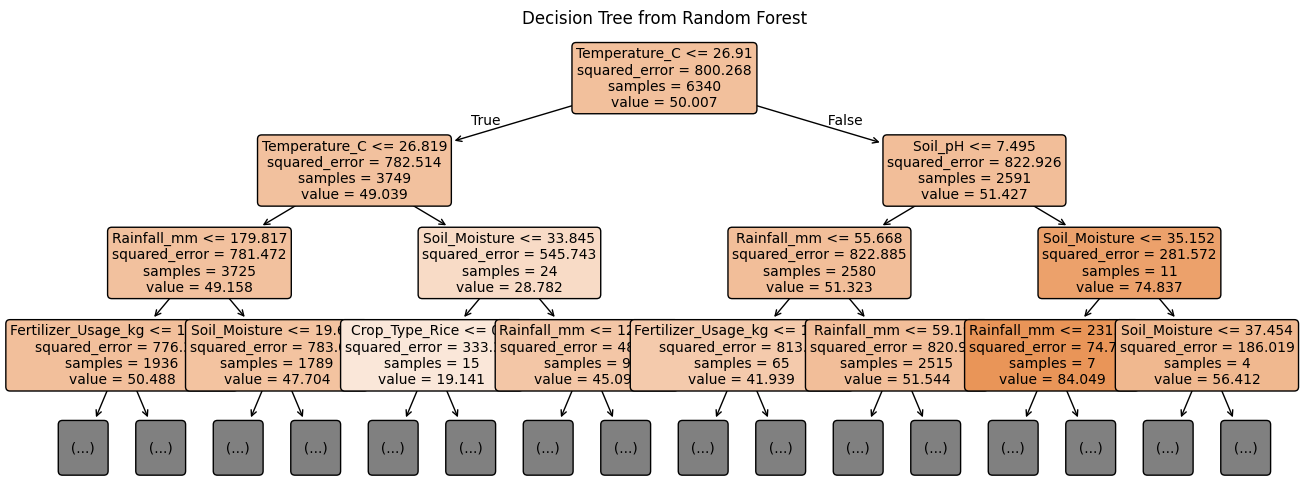

                     feature_importance
feature                                
Soil_pH                        0.159889
Fertilizer_Usage_kg            0.159503
Rainfall_mm                    0.157426
Pesticide_Usage_kg             0.156931
Temperature_C                  0.156874
Soil_Moisture                  0.155110
Crop_Type_Corn                 0.014114
Crop_Type_Soybean              0.013550
Crop_Type_Rice                 0.013507
Crop_Type_Wheat                0.013094


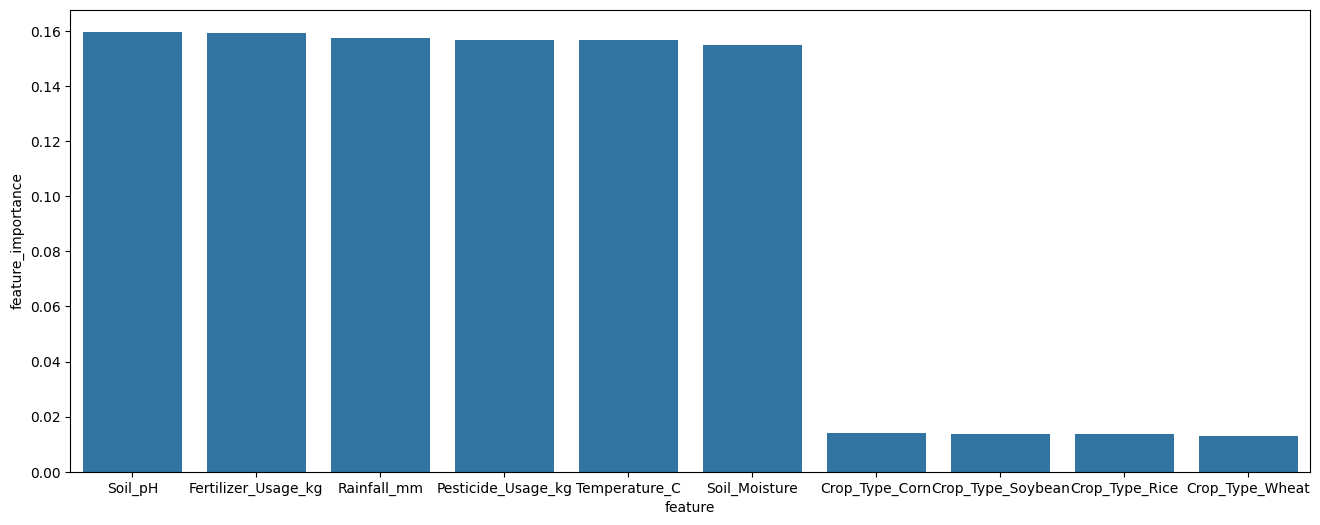

In [8]:
analyse_model(sustainability_reg_40, sustainability_x_40)

Analyzing by Crop Type

Details for Wheat
Mean Squared Error: 159.2861063404088
R-squared: 0.806155981746238


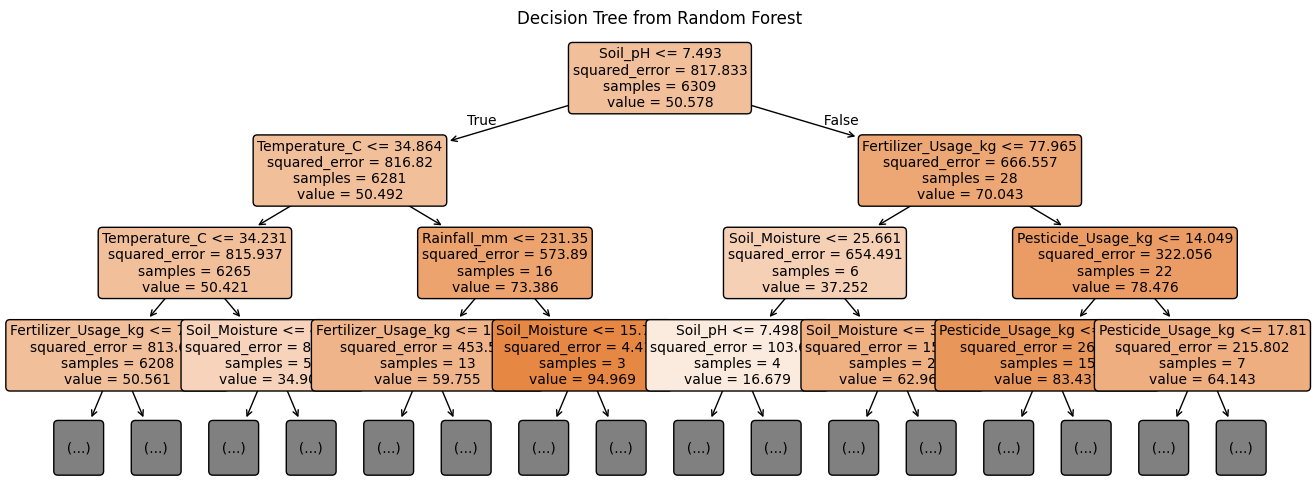

                     feature_importance
feature                                
Fertilizer_Usage_kg            0.145993
Rainfall_mm                    0.143655
Soil_pH                        0.143317
Pesticide_Usage_kg             0.141406
Temperature_C                  0.141209
Soil_Moisture                  0.139828
Rainfall_mm                    0.025393
Soil_pH                        0.025077
Pesticide_Usage_kg             0.024779
Fertilizer_Usage_kg            0.023497
Soil_Moisture                  0.023422
Temperature_C                  0.022423
Details for Soybean
Mean Squared Error: 149.96682143925742
R-squared: 0.8174971317937517


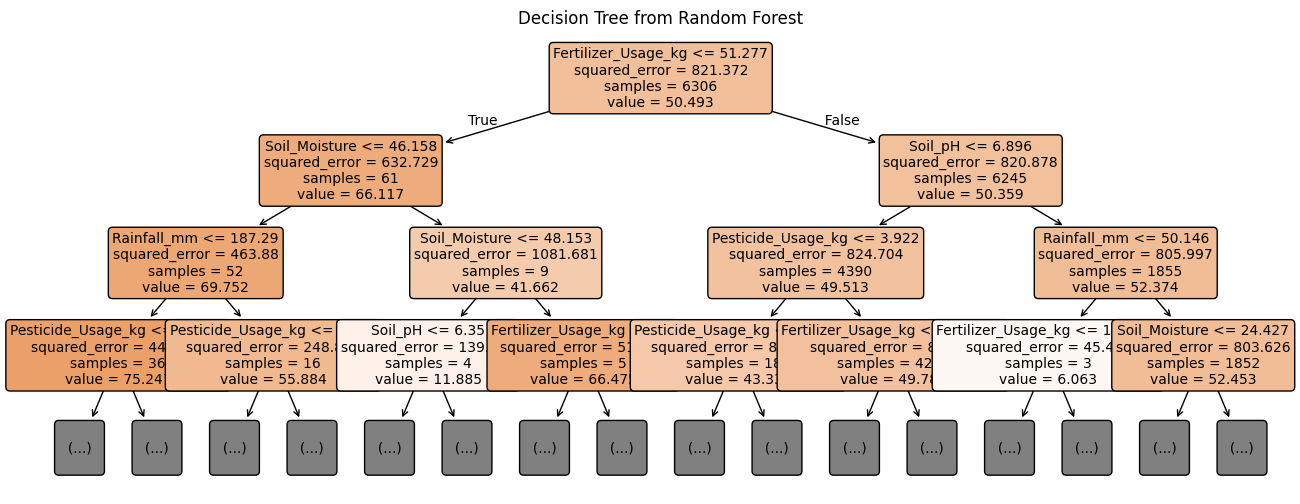

                     feature_importance
feature                                
Rainfall_mm                    0.144453
Fertilizer_Usage_kg            0.143118
Soil_pH                        0.142761
Soil_Moisture                  0.142239
Pesticide_Usage_kg             0.142147
Temperature_C                  0.141267
Rainfall_mm                    0.024986
Fertilizer_Usage_kg            0.024290
Pesticide_Usage_kg             0.024015
Temperature_C                  0.023903
Soil_pH                        0.023606
Soil_Moisture                  0.023215
Details for Corn
Mean Squared Error: 158.40724885542818
R-squared: 0.8072255117276976


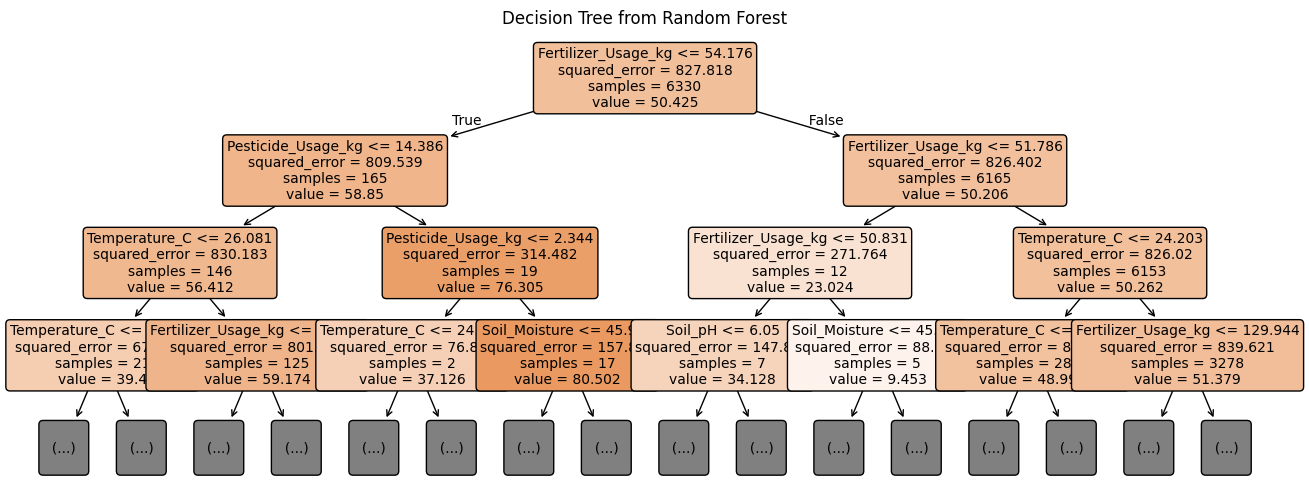

                     feature_importance
feature                                
Fertilizer_Usage_kg            0.146625
Rainfall_mm                    0.143804
Pesticide_Usage_kg             0.143241
Temperature_C                  0.142276
Soil_pH                        0.141291
Soil_Moisture                  0.139456
Temperature_C                  0.024994
Pesticide_Usage_kg             0.024269
Fertilizer_Usage_kg            0.023778
Soil_Moisture                  0.023771
Soil_pH                        0.023335
Rainfall_mm                    0.023161
Details for Rice
Mean Squared Error: 155.08544160682254
R-squared: 0.8112680015576524


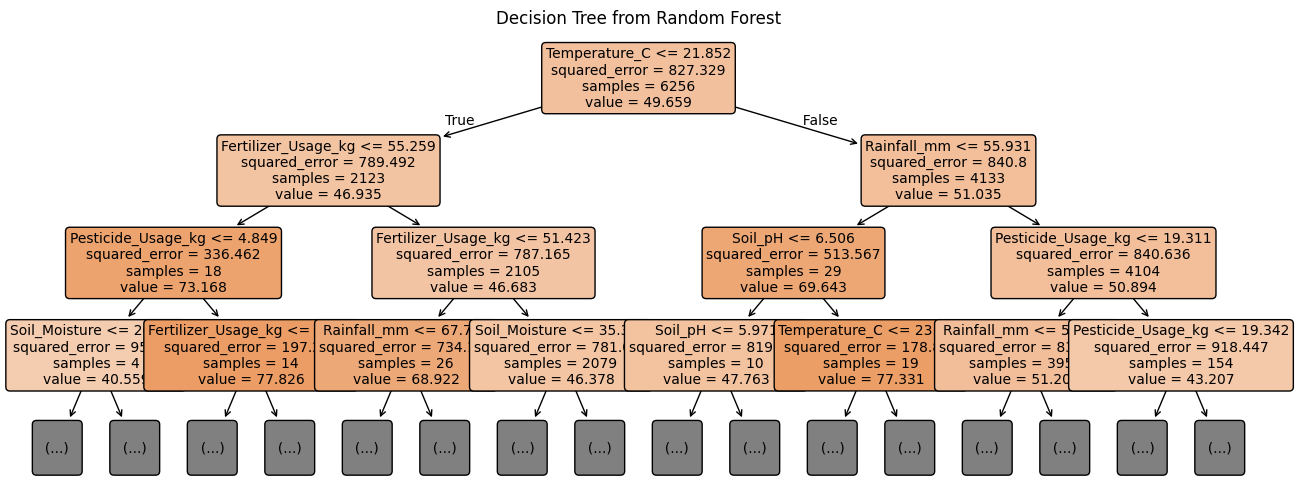

                     feature_importance
feature                                
Fertilizer_Usage_kg            0.147397
Pesticide_Usage_kg             0.144217
Rainfall_mm                    0.142779
Temperature_C                  0.142005
Soil_pH                        0.141589
Soil_Moisture                  0.141364
Rainfall_mm                    0.024179
Pesticide_Usage_kg             0.024002
Fertilizer_Usage_kg            0.023750
Temperature_C                  0.023669
Soil_pH                        0.022834
Soil_Moisture                  0.022214


In [12]:
for crop_type in farmer_df['Crop_Type'].unique():
    print(F"Details for {crop_type}")
    model, x, y = create_random_forest_reg('Sustainability_Score',crop_type=crop_type, drop_crop_yield=True, max_depth=40)
    score_reg(model, x, y)
    analyse_model(model, x, plot_graph = False)

This tells us Fertizlizer usage, pesticide usage and rainfall_mm have the most entropy on the Sustainability_Score

Analysing Crop Yield

In [13]:
crop_yield_reg, crop_yield_x, crop_yield_y = create_random_forest_reg('Crop_Yield_ton',drop_crop_yield=False, max_depth=None)

In [14]:
score_reg(crop_yield_reg, crop_yield_x, crop_yield_y)

Mean Squared Error: 0.9905013631948557
R-squared: 0.8544493703805569


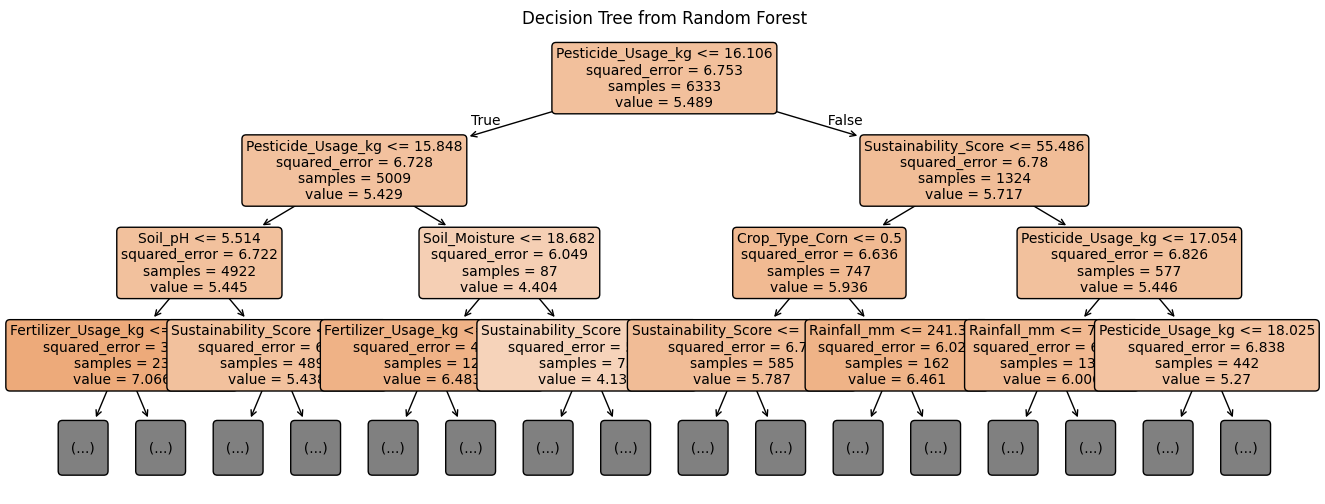

                      feature_importance
feature                                 
Pesticide_Usage_kg              0.136934
Sustainability_Score            0.136615
Fertilizer_Usage_kg             0.136550
Soil_Moisture                   0.136303
Soil_pH                         0.135763
Temperature_C                   0.135223
Rainfall_mm                     0.134582
Crop_Type_Corn                  0.012290
Crop_Type_Soybean               0.012029
Crop_Type_Wheat                 0.011891
Crop_Type_Rice                  0.011820


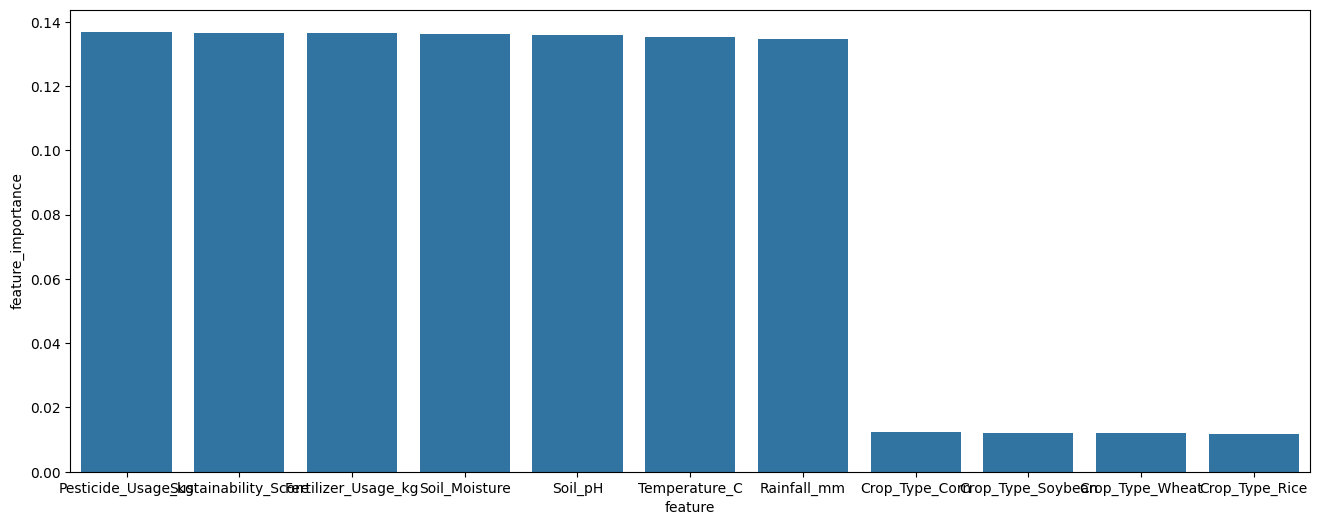

In [15]:
analyse_model(crop_yield_reg, crop_yield_x)

Details for Wheat
Mean Squared Error: 1.2168628725755428
R-squared: 0.8211863568843453


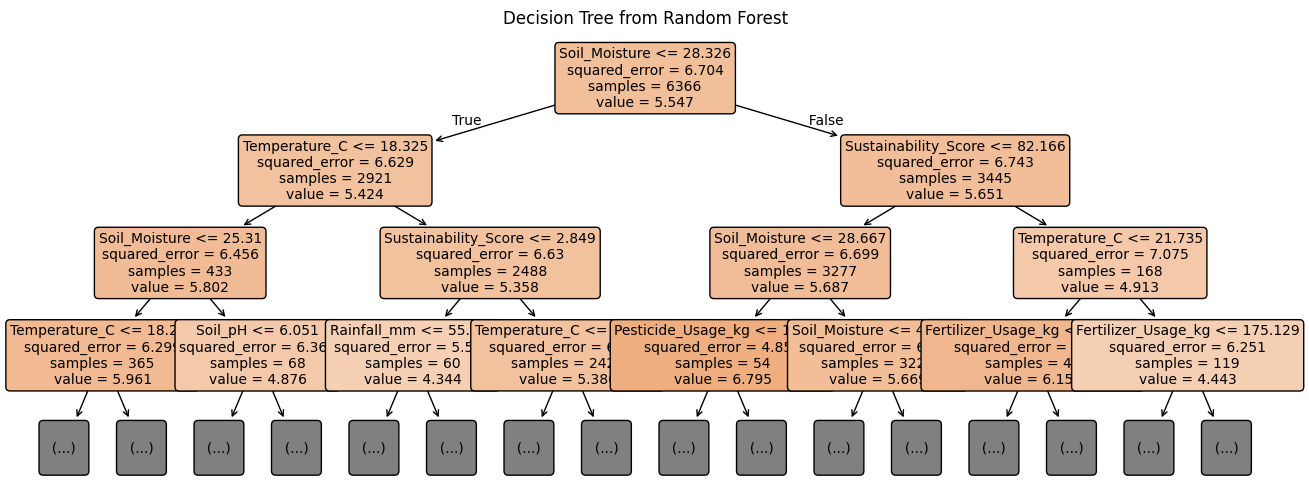

                      feature_importance
feature                                 
Fertilizer_Usage_kg             0.124114
Rainfall_mm                     0.124066
Temperature_C                   0.123602
Soil_Moisture                   0.123158
Soil_pH                         0.122451
Sustainability_Score            0.122139
Pesticide_Usage_kg              0.120979
Sustainability_Score            0.020464
Soil_pH                         0.020271
Soil_Moisture                   0.020124
Pesticide_Usage_kg              0.019968
Fertilizer_Usage_kg             0.019829
Rainfall_mm                     0.019617
Temperature_C                   0.019215
Details for Soybean
Mean Squared Error: 1.291522541577814
R-squared: 0.8102153857840035


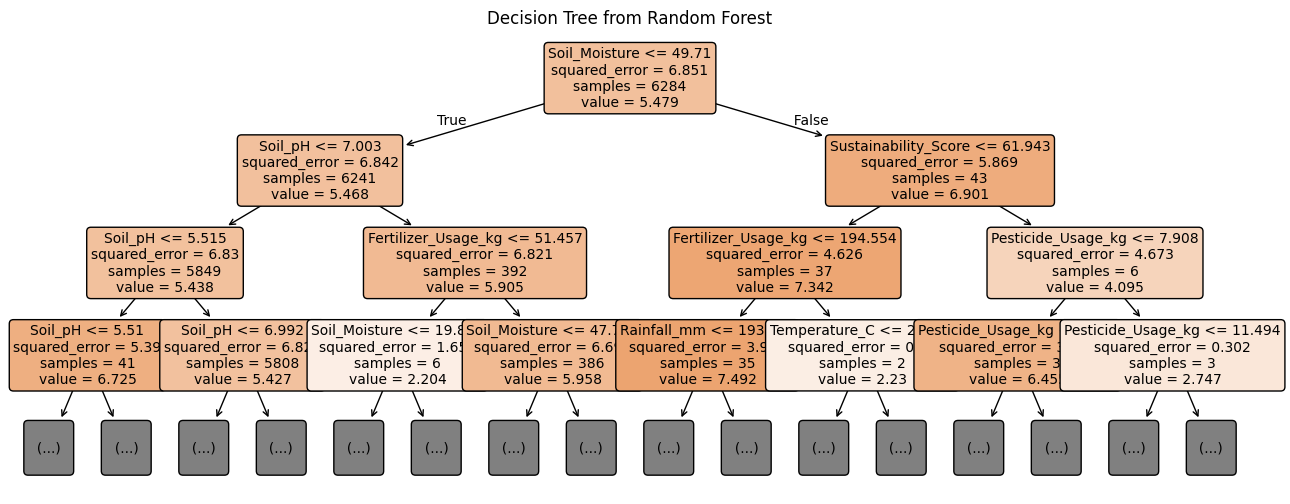

                      feature_importance
feature                                 
Fertilizer_Usage_kg             0.122905
Temperature_C                   0.122483
Rainfall_mm                     0.122091
Soil_Moisture                   0.121493
Soil_pH                         0.121169
Sustainability_Score            0.120960
Pesticide_Usage_kg              0.120043
Soil_pH                         0.022267
Temperature_C                   0.021820
Fertilizer_Usage_kg             0.021153
Sustainability_Score            0.021094
Soil_Moisture                   0.021080
Pesticide_Usage_kg              0.021071
Rainfall_mm                     0.020373
Details for Corn
Mean Squared Error: 1.2107569542281607
R-squared: 0.8220835997281106


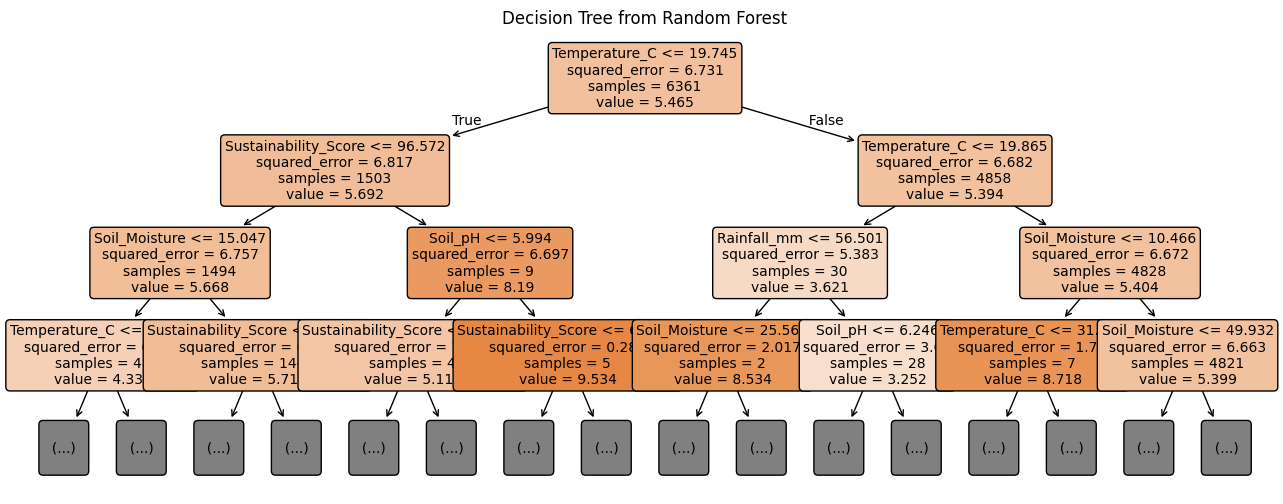

                      feature_importance
feature                                 
Fertilizer_Usage_kg             0.125741
Rainfall_mm                     0.123997
Soil_pH                         0.123624
Temperature_C                   0.123488
Soil_Moisture                   0.122319
Sustainability_Score            0.122060
Pesticide_Usage_kg              0.121162
Rainfall_mm                     0.020896
Soil_Moisture                   0.020061
Sustainability_Score            0.019840
Soil_pH                         0.019794
Pesticide_Usage_kg              0.019462
Fertilizer_Usage_kg             0.018909
Temperature_C                   0.018645
Details for Rice
Mean Squared Error: 1.1596454044766948
R-squared: 0.8295942589998514


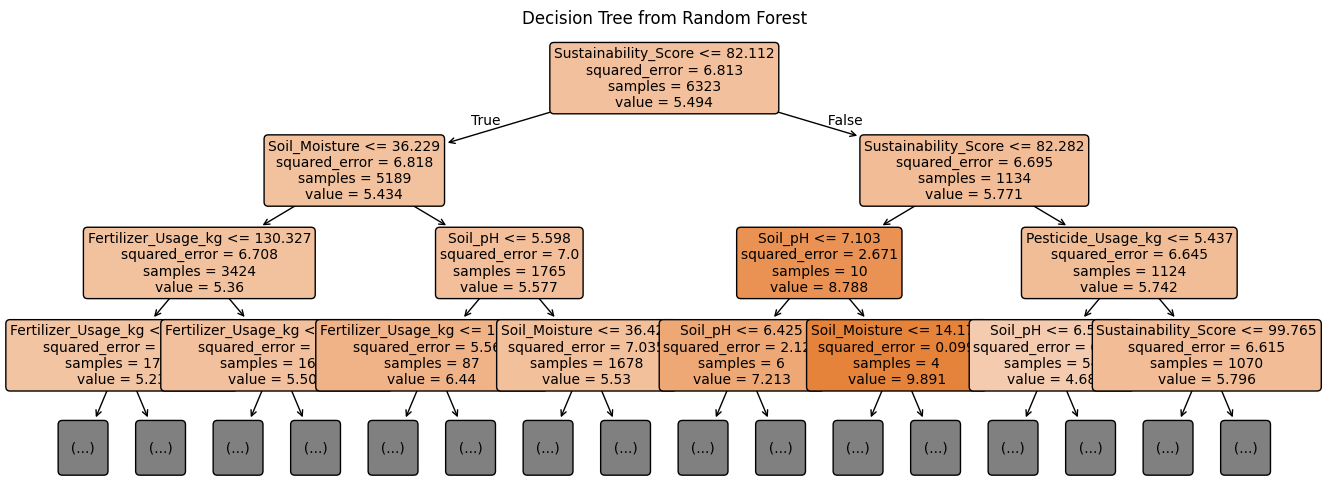

                      feature_importance
feature                                 
Fertilizer_Usage_kg             0.126616
Temperature_C                   0.125995
Soil_Moisture                   0.125919
Soil_pH                         0.123745
Rainfall_mm                     0.123407
Pesticide_Usage_kg              0.120576
Sustainability_Score            0.120523
Soil_pH                         0.020202
Soil_Moisture                   0.019736
Temperature_C                   0.018911
Pesticide_Usage_kg              0.018880
Fertilizer_Usage_kg             0.018680
Rainfall_mm                     0.018440
Sustainability_Score            0.018371


In [16]:
for crop_type in farmer_df['Crop_Type'].unique():
    print(F"Details for {crop_type}")
    model, x, y = create_random_forest_reg('Crop_Yield_ton',crop_type=crop_type, drop_crop_yield=False, max_depth=40)
    score_reg(model, x, y)
    analyse_model(model, x, plot_graph = False)